In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

import math

<a id='contents'></a>
# Table of Contents

&nbsp;&nbsp;[1 Euler Method](#no_1)

&nbsp;&nbsp;[2 Plot](#no_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Regular 2D plot](#no_21)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Loglog Plot (2D)](#no_22)

&nbsp;&nbsp;[3 Norm](#no_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1 L1 Norm](#no_31)

&nbsp;&nbsp;[4 Order of Convergence](#no_4)

&nbsp;&nbsp;[5 Second Order / RK / Modified Euler Method](#no_5)

&nbsp;&nbsp;[6 Tricks](#no_6)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[6.1 Mask](#no_61)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[6.2 Animation](#no_62)

&nbsp;&nbsp;[7 CFL number](#no_7)

&nbsp;&nbsp;[8 Convection Schemes](#no_8)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[8.1 Lax-Friedrichs scheme](#no_81)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[8.2 Lax-Wendroff scheme](#no_82)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[8.3 MacCormack scheme](#no_83)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[8.4 The Richtmyer method](#no_84)

<a id='no_1'></a>
# 1 Euler Method

$$
\begin{equation}
u_{n+1} = u_n + \Delta t \,f(u_n)
\end{equation}
$$

In [2]:
def euler_step(u, f, dt, *args):
    """
    Returns the solution at the next time step using Euler's method.
    
    Parameters
    ----------
    u : numpy.ndarray
        Solution at the previous time step
        as a 1D array of floats.
    f : function
        Function to compute the right-hand side of the system.
    dt : float
        Time-step size.
    args : tuple, optional
        Positional arguments to pass to the function f.
    
    Returns
    -------
    u_new : numpy.ndarray
        The solution at the next time step
        as a 1D array of floats.
    """
    u_new = u + dt * f(u, *args)
    return u_new


[Return to Top](#contents)

<a id='no_2'></a>
# 2 Plot

<a id='no_21'></a>
## 2.1 Regular 2D plot

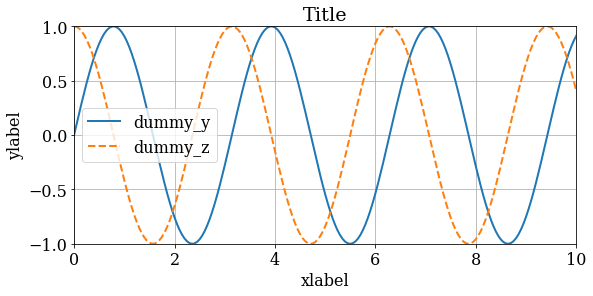

In [3]:
# dummy x,y,z
dummy_x = numpy.linspace(0.0, 10.0, num=201)
dummy_y = numpy.sin(2.0 * dummy_x)
dummy_z = numpy.cos(2.0 * dummy_x)

custom_title = 'Title'
custom_xlabel = 'xlabel'
custom_ylabel = 'ylabel'

pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title(custom_title)  # set the title
pyplot.xlabel(custom_xlabel)  # set the x-axis label
pyplot.ylabel(custom_ylabel)  # set the y-axis label
pyplot.xlim(dummy_x[0], dummy_x[-1])  # set the x-axis limits
pyplot.ylim(numpy.min(dummy_y), numpy.max(dummy_y))  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(dummy_x, dummy_y, color='C0', label='dummy_y', linestyle='-', linewidth=2)
pyplot.plot(dummy_x, dummy_z, color='C1', label='dummy_z', linestyle='--', linewidth=2)
pyplot.legend();

[Return to Top](#contents)

<a id='no_22'></a>
## 2.2 Loglog Plot (2D)

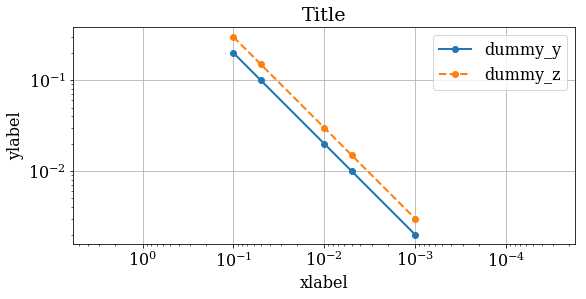

In [4]:
# dummy x,y,z
dummy_x = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])
dummy_y = dummy_x * 2.0
dummy_z = dummy_x * 3.0

custom_title = 'Title'
custom_xlabel = 'xlabel'
custom_ylabel = 'ylabel'

pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title(custom_title)  # set the title
pyplot.xlabel(custom_xlabel)  # set the x-axis label
pyplot.ylabel(custom_ylabel)  # set the y-axis label
pyplot.xlim(dummy_x[0], dummy_x[-1])  # set the x-axis limits
# pyplot.ylim(numpy.min(dummy_y), numpy.max(dummy_y))  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.loglog(dummy_x, dummy_y, color='C0', label='dummy_y', linestyle='-', linewidth=2, marker='o')
pyplot.loglog(dummy_x, dummy_z, color='C1', label='dummy_z', linestyle='--', linewidth=2, marker='o')
pyplot.legend()
pyplot.axis('equal');

[Return to Top](#contents)

<a id='no_3'></a>
# 3 Norm

<a id='no_31'></a>
## 3.1 L1 Norm

In [5]:
def l1_error(z, z_exact, dt):
    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

In [6]:
def l1_diff(u_coarse, u_fine, dt):
    """
    Returns the difference in the L1-norm between the solution on
    a coarse grid and the solution on a fine grid.
    
    Parameters
    ----------
    u_coarse : numpy.ndarray
        Solution on the coarse grid as an array of floats.
    u_fine : numpy.ndarray
        Solution on the fine grid as an array of floats.
    dt : float
        Time-step size.
    
    Returns
    -------
    diff : float
        The difference between the two solutions in the L1-norm
        scaled by the time-step size.
    """
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

[Return to Top](#contents)

<a id='no_4'></a>
# 4 Order of Convergence

The order of convergence is the rate at which the numerical solution approaches the exact one as the mesh is refined. Considering that we're not comparing with an exact solution, we use 3 grid resolutions that are refined at a constant ratio $r$ to find the *observed order of convergence* ($p$), which is given by:

$$
\begin{equation}
p = \frac{\log \left(\frac{f_3-f_2}{f_2-f_1} \right) }{\log(r)}
\end{equation}
$$

where $f_1$ is the finest mesh solution, and $f_3$ the coarsest. 

Please see [Module 1 Lesson 3](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/01_phugoid/01_03_PhugoidFullModel.ipynb#Order-of-convergence) for codes in details.

[Return to Top](#contents)

<a id='no_5'></a>
# 5 Second Order / RK / Modified Euler Method

$$
\begin{align}
u_{n+1/2}   & = u_n + \frac{\Delta t}{2} f(u_n) \\
u_{n+1} & = u_n + \Delta t \,\, f(u_{n+1/2})
\end{align}
$$

In [7]:
def rk2_step(u, f, dt, *args):
    """
    Returns the solution at the next time step using 2nd-order
    Runge-Kutta method.
    
    Parameters
    ----------
    u : numpy.ndarray
        Solution at the previous time step
        as a 1D array of floats.
    f : function
        Function to compute the right-hand side of the system.
    dt : float
        Time-step size.
    args : tuple, optional
        Positional arguments to pass to the function f.
    
    Returns
    -------
    u_new : numpy.ndarray
        The solution at the next time step
        as a 1D array of floats.
    """
    u_star = u + 0.5 * dt * f(u, *args)
    u_new = u + dt * f(u_star, *args)
    return u_new

In [8]:
def leapfrog_step(u_prev, u, f, dt, *args):
    """
    Returns the solution at the next time step using 
    the leapfrog method.
    
    Parameters
    ----------
    u_prev : numpy.ndarray
        Solution at the time step n-1
        as a 1D array of floats.
    u : numpy.ndarray
        Solution at the previous time step
        as a 1D array of floats.
    f : function
        Function to compute the right-hand side of the system.
    dt : float
        Time-step size.
    args : tuple, optional
        Positional arguments to pass to the function f.
    
    Returns
    -------
    u_new : numpy.ndarray
        The solution at the next time step
        as a 1D array of floats.
    """
    u_new = u_prev + 2.0 * dt * f(u, *args)
    return u_new

[Return to Top](#contents)

<a id='no_6'></a>
# 6 Tricks

<a id='no_61'></a>
## 6.1 Mask

In [9]:
# Define the grid point coordinates.
x = numpy.linspace(0.0, 2.0, num=41)
# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(41)
# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
print(mask)

# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0
print(u0)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


[Return to Top](#contents)

<a id='no_62'></a>
## 6.2 Animation

In [10]:
from matplotlib import animation
from IPython.display import HTML

In [11]:
def update_plot(n, u_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

### Create interatctive figure with `ipywidgets`

[Return to Top](#contents)

<a id='no_7'></a>
# 7 CFL number

### 1D Convection

$$
\begin{equation}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
\end{equation}
$$

$$
\begin{equation}
\sigma = \frac{c \Delta t}{\Delta x} \leq 1
\end{equation}
$$

### 1D Diffusion

$$
\begin{equation}
\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}
\end{equation}
$$

$$
\begin{equation}
\nu \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{equation}
$$

[Return to Top](#contents)

<a id='no_8'></a>
# 8 Convection Schemes

<a id='no_81'></a>
## 8.1 Lax-Friedrichs scheme

$$
\begin{equation}
\rho_i^{n+1} = \frac{1}{2}(\rho^n_{i+1}+\rho^n_{i-1}) - \frac{\Delta t}{2 \Delta x}(F^n_{i+1}-F^n_{i-1})
\end{equation}
$$

In [12]:
def lax_friedrichs(rho0, nt, dt, dx, bc_values, *args):
    """
    Computes the traffic density on the road 
    at a certain time given the initial traffic density.
    Integration using Lax-Friedrichs scheme.
    
    Parameters
    ----------
    rho0 : numpy.ndarray
        The initial traffic density along the road
        as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_values : 2-tuple of floats
        The value of the density at the first and last locations.
    args : list or tuple
        Positional arguments to be passed to the flux function.
    
    Returns
    -------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road.
    """
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # Compute the flux.
        F = flux(rho, *args)
        # Advance in time using Lax-Friedrichs scheme.
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) -
                     dt / (2.0 * dx) * (F[2:] - F[:-2]))
        # Set the value at the first location.
        rho[0] = bc_values[0]
        # Set the value at the last location.
        rho[-1] = bc_values[1]
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

[Return to Top](#contents)

<a id='no_82'></a>
## 8.2 Lax-Wendroff scheme

$$
\begin{equation}
J = \frac{\partial F}{\partial \rho} = u _{\rm max} \left(1-2\frac{\rho}{\rho_{\rm max}} \right)
\end{equation}
$$

\begin{equation}J^n_i = \frac{\partial F}{\partial \rho} = u_{\rm max} \left(1-2\frac{\rho^n_i}{\rho_{\rm max}} \right)\end{equation}

In [13]:
def jacobian(rho, u_max, rho_max):
    """
    Computes the Jacobian for our traffic model.
    
    Parameters
    ----------
    rho : numpy.ndarray
       Traffic density along the road as a 1D array of floats.
    u_max : float
        Maximum speed allowed on the road.
    rho_max : float
        Maximum car density allowed on the road.
    
    Returns
    -------
    J : numpy.ndarray
        The Jacobian as a 1D array of floats.
    """
    J = u_max * (1.0 - 2.0 * rho / rho_max)
    return J

In [14]:
def lax_wendroff(rho0, nt, dt, dx, bc_values, *args):
    """
    Computes the traffic density on the road 
    at a certain time given the initial traffic density.
    Integration using Lax-Wendroff scheme.
    
    Parameters
    ----------
    rho0 : numpy.ndarray
        The initial traffic density along the road
        as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_values : 2-tuple of floats
        The value of the density at the first and last locations.
    args : list or tuple
        Positional arguments to be passed to the
        flux and Jacobien functions.
    
    Returns
    -------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road.
    """
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # Compute the flux.
        F = flux(rho, *args)
        # Compute the Jacobian.
        J = jacobian(rho, *args)
        # Advance in time using Lax-Wendroff scheme.
        rho[1:-1] = (rho[1:-1] -
                     dt / (2.0 * dx) * (F[2:] - F[:-2]) +
                     dt**2 / (4.0 * dx**2) *
                     ((J[1:-1] + J[2:]) * (F[2:] - F[1:-1]) -
                      (J[:-2] + J[1:-1]) * (F[1:-1] - F[:-2])))
        # Set the value at the first location.
        rho[0] = bc_values[0]
        # Set the value at the last location.
        rho[-1] = bc_values[1]
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

[Return to Top](#contents)

<a id='no_83'></a>
## 8.3 MacCormack scheme

$$
\begin{equation}
\rho^*_i = \rho^n_i - \frac{\Delta t}{\Delta x} (F^n_{i+1}-F^n_{i}) \ \ \ \ \ \ \text{(predictor)}
\end{equation}
$$

$$
\begin{equation}
\rho^{n+1}_i = \frac{1}{2} (\rho^n_i + \rho^*_i - \frac{\Delta t}{\Delta x} (F^*_i - F^{*}_{i-1})) \ \ \ \ \ \ \text{(corrector)}
\end{equation}
$$

In [15]:
def maccormack(rho0, nt, dt, dx, bc_values, *args):
    """
    Computes the traffic density on the road 
    at a certain time given the initial traffic density.
    Integration using MacCormack scheme.
    
    Parameters
    ----------
    rho0 : numpy.ndarray
        The initial traffic density along the road
        as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_values : 2-tuple of floats
        The value of the density at the first and last locations.
    args : list or tuple
        Positional arguments to be passed to the flux function.
    
    Returns
    -------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road.
    """
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    rho_star = rho.copy()
    for n in range(nt):
        # Compute the flux.
        F = flux(rho, *args)
        # Predictor step of the MacCormack scheme.
        rho_star[1:-1] = (rho[1:-1] -
                          dt / dx * (F[2:] - F[1:-1]))
        # Compute the flux.
        F = flux(rho_star, *args)
        # Corrector step of the MacCormack scheme.
        rho[1:-1] = 0.5 * (rho[1:-1] + rho_star[1:-1] -
                           dt / dx * (F[1:-1] - F[:-2]))
        # Set the value at the first location.
        rho[0] = bc_values[0]
        # Set the value at the last location.
        rho[-1] = bc_values[1]
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

[Return to Top](#contents)

<a id='no_84'></a>
## 8.4 The Richtmyer method

Richtmyer is a *two-step method*, given by:

$$
\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right) \\
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}
$$

The flux vectors used in the second step are obtained by evaluating the flux functions on the output of the first step:

$$
\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \underline{\mathbf{f}}\left(\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right)
$$

The first step is like a *predictor* of the solution: if you look closely, you'll see that we are applying a Lax-Friedrichs scheme here. The second step is a *corrector* that applies a leapfrog update. Figure 3 gives a sketch of the stencil for Richtmyer method, where the "intermediate time" $n+1/2$ will require a temporary variable in your code, just like we had in the MacCormack scheme.

[Return to Top](#contents)